# Time Series 时间序列

In [1]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

## 11.1Date and Time Data Types and Tools 日期和时间类型和工具

In [1]:
from datetime import datetime
now = datetime.now()
now
now.year, now.month, now.day

(2021, 4, 14)

In [ ]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta
delta.days
delta.seconds

In [ ]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(12)
start - 2 * timedelta(12)

### Converting Between String and Datetime 字符串和datetime之间的转换

In [6]:
stamp = datetime(2011, 1, 3)
print(str(stamp))
print(datetime.now())
print(datetime.strftime(stamp, '%Y-%m-%d'))
stamp.strftime('%Y-%m-%d')

2011-01-03 00:00:00
2021-04-14 20:14:22.408308
2011-01-03


'2011-01-03'

In [7]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [ ]:
from dateutil.parser import parse
parse('2011-01-03')

In [ ]:
parse('Jan 31, 1997 10:45 PM')

In [ ]:
parse('6/12/2011', dayfirst=True)

In [ ]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

In [ ]:
idx = pd.to_datetime(datestrs + [None])
idx
idx[2]
pd.isnull(idx)

## 11.2 Time Series Basics 时间序列基础

In [11]:
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [12]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [13]:
ts[::2]

2011-01-02   -0.204708
2011-01-07   -0.519439
2011-01-10    1.965781
dtype: float64

In [14]:
ts + ts[::2]

2011-01-02   -0.409415
2011-01-05         NaN
2011-01-07   -1.038877
2011-01-08         NaN
2011-01-10    3.931561
2011-01-12         NaN
dtype: float64

In [15]:
#'<M8[ns]' dtype='datetime64[ns]' M8应该就是datetime64的对应
ts.index.dtype

dtype('<M8[ns]')

In [16]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

### Indexing, Selection, Subsetting 索引 选取 和子集构造

In [17]:
 ts.index[2]

Timestamp('2011-01-07 00:00:00')

In [18]:
stamp = ts.index[2]
ts[stamp]

-0.5194387150567381

In [20]:
print(ts)
print(ts['1/10/2011'])
ts['20110110']

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64
1.9657805725027142


1.9657805725027142

In [21]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))
print(longer_ts)
longer_ts['2001']

2000-01-01    0.092908
2000-01-02    0.281746
2000-01-03    0.769023
2000-01-04    1.246435
2000-01-05    1.007189
                ...   
2002-09-22    0.930944
2002-09-23   -0.811676
2002-09-24   -1.830156
2002-09-25   -0.138730
2002-09-26    0.334088
Freq: D, Length: 1000, dtype: float64


2001-01-01    1.599534
2001-01-02    0.474071
2001-01-03    0.151326
2001-01-04   -0.542173
2001-01-05   -0.475496
                ...   
2001-12-27    0.057874
2001-12-28   -0.433739
2001-12-29    0.092698
2001-12-30   -1.397820
2001-12-31    1.457823
Freq: D, Length: 365, dtype: float64

In [22]:
longer_ts['2001-05']

2001-05-01   -0.622547
2001-05-02    0.936289
2001-05-03    0.750018
2001-05-04   -0.056715
2001-05-05    2.300675
                ...   
2001-05-27    0.235477
2001-05-28    0.111835
2001-05-29   -1.251504
2001-05-30   -2.949343
2001-05-31    0.634634
Freq: D, Length: 31, dtype: float64

In [23]:
ts[datetime(2011, 1, 7):]

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [25]:
ts
ts['1/6/2011':'1/11/2012']

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [26]:
ts.truncate(after='1/9/2011') #截断后面的

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
dtype: float64

In [ ]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])
long_df.loc['5-2001']

### Time Series with Duplicate Indices 

In [ ]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

In [ ]:
dup_ts.index.is_unique

In [ ]:
dup_ts['1/3/2000']  # not duplicated
dup_ts['1/2/2000']  # duplicated

In [ ]:
grouped = dup_ts.groupby(level=0)
grouped.mean()
grouped.count()

## 11.3 Date Ranges, Frequencies, and Shifting 日期范围、频率和移动

In [28]:
print(ts)
resampler = ts.resample('D')
resampler

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64


### Generating Date Ranges

In [29]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [30]:
print(pd.date_range(start='2012-04-01', periods=20))
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')


DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [35]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM') #business end of month 最后一个工作日

DatetimeIndex(['2000-01-03', '2000-02-01', '2000-03-01', '2000-04-03',
               '2000-05-01', '2000-06-01', '2000-07-03', '2000-08-01',
               '2000-09-01', '2000-10-02', '2000-11-01', '2000-12-01'],
              dtype='datetime64[ns]', freq='BMS')

In [32]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [33]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Date Offsets

In [ ]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

In [ ]:
four_hours = Hour(4)
four_hours

In [36]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex([], dtype='datetime64[ns]', freq='BM')

In [ ]:
Hour(2) + Minute(30)

In [37]:
pd.date_range('2000-01-01', periods=10, freq='bm') #锚点偏移量（anchored offset）

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31'],
              dtype='datetime64[ns]', freq='BM')

#### Week of month dates

In [ ]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
list(rng)

### Shifting (Leading and Lagging) Data

In [ ]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts
ts.shift(2)
ts.shift(-2)

ts / ts.shift(1) - 1

In [ ]:
ts.shift(2, freq='M')

In [ ]:
ts.shift(3, freq='D')
ts.shift(1, freq='90T')

#### Shifting dates with offsets

In [39]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [ ]:
now + MonthEnd()
now + MonthEnd(2)

In [40]:
offset = MonthEnd()
offset.rollforward(now)
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [41]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))
print(ts)
ts.groupby(offset.rollforward).mean()

2000-01-15    1.128179
2000-01-19    1.568606
2000-01-23   -0.342277
2000-01-27   -0.009813
2000-01-31    0.053072
2000-02-04   -0.041943
2000-02-08   -1.694312
2000-02-12   -0.362381
2000-02-16    1.127453
2000-02-20    2.183830
2000-02-24   -1.186623
2000-02-28    0.334270
2000-03-03   -1.028389
2000-03-07   -0.168496
2000-03-11   -0.998948
2000-03-15   -1.531151
2000-03-19   -1.079111
2000-03-23   -1.097732
2000-03-27    0.405148
2000-03-31   -0.227228
Freq: 4D, dtype: float64


2000-01-31    0.479553
2000-02-29    0.051470
2000-03-31   -0.715738
dtype: float64

In [ ]:
ts.resample('M').mean()

## 11.4Time Zone Handling

In [ ]:
import pytz
pytz.common_timezones[-5:]

In [ ]:
tz = pytz.timezone('America/New_York')
tz

### Time Zone Localization and Conversion

In [ ]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

In [ ]:
print(ts.index.tz)

In [ ]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

In [ ]:
ts
ts_utc = ts.tz_localize('UTC')
ts_utc
ts_utc.index

In [ ]:
ts_utc.tz_convert('America/New_York')

In [ ]:
ts_eastern = ts.tz_localize('America/New_York')
ts_eastern.tz_convert('UTC')
ts_eastern.tz_convert('Europe/Berlin')

In [ ]:
ts.index.tz_localize('Asia/Shanghai')

### Operations with Time Zone−Aware Timestamp Objects

In [ ]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('America/New_York')

In [ ]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

In [ ]:
stamp_utc.value
stamp_utc.tz_convert('America/New_York').value

In [ ]:
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp
stamp + Hour()

In [ ]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp
stamp + 2 * Hour()

### Operations Between Different Time Zones

In [ ]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index

## 11.5Periods and Period Arithmetic 时期及其算术运算

In [ ]:
p = pd.Period(2007, freq='A-DEC')
p

In [ ]:
p + 5
p - 2

In [ ]:
pd.Period('2014', freq='A-DEC') - p

In [ ]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

In [ ]:
pd.Series(np.random.randn(6), index=rng)

In [ ]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

### Period Frequency Conversion 时期的频率转换

In [ ]:
p = pd.Period('2007', freq='A-DEC')
p
p.asfreq('M', how='start')
p.asfreq('M', how='end')

In [ ]:
p = pd.Period('2007', freq='A-JUN')
p
p.asfreq('M', 'start')
p.asfreq('M', 'end')

In [ ]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

In [8]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
print(ts)
ts.asfreq('M', how='start')

2006    1.965781
2007    1.393406
2008    0.092908
2009    0.281746
Freq: A-DEC, dtype: float64


2006-01    1.965781
2007-01    1.393406
2008-01    0.092908
2009-01    0.281746
Freq: M, dtype: float64

In [ ]:
ts.asfreq('B', how='end')

### Quarterly Period Frequencies 按季度计算的时期频率

In [ ]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

In [ ]:
p.asfreq('D', 'start')
p.asfreq('D', 'end')

In [ ]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm
p4pm.to_timestamp()

In [ ]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

### Converting Timestamps to Periods (and Back)

In [ ]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
ts
pts = ts.to_period()
pts

In [ ]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2
ts2.to_period('M')

In [ ]:
pts = ts2.to_period()
pts
pts.to_timestamp(how='end')

### Creating a PeriodIndex from Arrays 通过数组创建PeriodIndex

In [6]:
data = pd.read_csv('examples/macrodata.csv')

data.year
data.quarter
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [27]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,freq='Q-DEC')
print(index)
data.index = index
data.infl

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')


1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## 11.6Resampling and Frequency Conversion  重采样及频率转换

In [2]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts
ts.resample('M').mean()
ts.resample('M', kind='period').mean()

2000-01    0.304166
2000-02   -0.404772
2000-03    0.021947
2000-04    0.554480
Freq: M, dtype: float64

### Downsampling

In [5]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [ ]:
ts.resample('5min', closed='right').sum()

In [ ]:
ts.resample('5min', closed='right').sum()

In [ ]:
ts.resample('5min', closed='right', label='right').sum()

In [6]:
ts.resample('5min', closed='right',
            label='right', loffset='-1s').sum()

<ipython-input-6-b63ded3800c4>:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  ts.resample('5min', closed='right',


1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

#### Open-High-Low-Close (OHLC) resampling

In [7]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### Upsampling and Interpolation 升采样和插值

In [8]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-1.565657,-0.562540,-0.032664,-0.929006
2000-01-12,-0.482573,-0.036264,1.095390,0.980928


In [9]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-1.565657,-0.562540,-0.032664,-0.929006
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.482573,-0.036264,1.095390,0.980928


In [ ]:
frame.resample('D').ffill()

In [ ]:
frame.resample('D').ffill(limit=2)

In [ ]:
frame.resample('W-THU').ffill()

### Resampling with Periods

In [10]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001',
                                           freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
print(frame[:5])
annual_frame = frame.resample('A-DEC').mean()
annual_frame

         Colorado     Texas  New York      Ohio
2000-01 -0.589488  1.581700 -0.528735  0.457002
2000-02  0.929969 -1.569271 -1.022487 -0.402827
2000-03  0.220487 -0.193401  0.669158 -1.648985
2000-04 -2.252797 -1.166832  0.353607  0.702110
2000-05 -0.274569 -0.139142  0.107657 -0.606545


,Colorado,Texas,New York,Ohio
2000,0.024752,-0.089078,-0.131906,-0.313531
2001,0.113353,0.025106,0.033542,0.193194


In [12]:
# Q-DEC: Quarterly, year ending in December
print(annual_frame.resample('Q-DEC').ffill())
print(annual_frame.resample('Q-NOV').ffill())
annual_frame.resample('Q-DEC', convention='end').ffill()

        Colorado     Texas  New York      Ohio
2000Q1  0.024752 -0.089078 -0.131906 -0.313531
2000Q2  0.024752 -0.089078 -0.131906 -0.313531
2000Q3  0.024752 -0.089078 -0.131906 -0.313531
2000Q4  0.024752 -0.089078 -0.131906 -0.313531
2001Q1  0.113353  0.025106  0.033542  0.193194
2001Q2  0.113353  0.025106  0.033542  0.193194
2001Q3  0.113353  0.025106  0.033542  0.193194
2001Q4  0.113353  0.025106  0.033542  0.193194
        Colorado     Texas  New York      Ohio
2000Q1  0.024752 -0.089078 -0.131906 -0.313531
2000Q2  0.024752 -0.089078 -0.131906 -0.313531
2000Q3  0.024752 -0.089078 -0.131906 -0.313531
2000Q4  0.024752 -0.089078 -0.131906 -0.313531
2001Q1  0.113353  0.025106  0.033542  0.193194
2001Q2  0.113353  0.025106  0.033542  0.193194
2001Q3  0.113353  0.025106  0.033542  0.193194
2001Q4  0.113353  0.025106  0.033542  0.193194
2002Q1  0.113353  0.025106  0.033542  0.193194


,Colorado,Texas,New York,Ohio
2000Q4,0.024752,-0.089078,-0.131906,-0.313531
2001Q1,0.024752,-0.089078,-0.131906,-0.313531
2001Q2,0.024752,-0.089078,-0.131906,-0.313531
2001Q3,0.024752,-0.089078,-0.131906,-0.313531
2001Q4,0.113353,0.025106,0.033542,0.193194


In [13]:
annual_frame.resample('Q-MAR').ffill() #这里例子不错  
# 2000.3=2000Q4
# 2000.6=2001Q1
# 2000.9=2001Q2
# 2000.12=2001Q3
# 2001.3=2001Q4   2001年3月年终。
# 2001.6=2002Q1
# 2001.9=2002Q2
# 2001.12=2002Q3

,Colorado,Texas,New York,Ohio
2000Q4,0.024752,-0.089078,-0.131906,-0.313531
2001Q1,0.024752,-0.089078,-0.131906,-0.313531
2001Q2,0.024752,-0.089078,-0.131906,-0.313531
2001Q3,0.024752,-0.089078,-0.131906,-0.313531
2001Q4,0.113353,0.025106,0.033542,0.193194
2002Q1,0.113353,0.025106,0.033542,0.193194
2002Q2,0.113353,0.025106,0.033542,0.193194
2002Q3,0.113353,0.025106,0.033542,0.193194


## 11.7 Moving Window Functions 移动窗口函数

In [15]:
close_px_all = pd.read_csv('examples/stock_px_2.csv',
                           parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()

<AxesSubplot:>

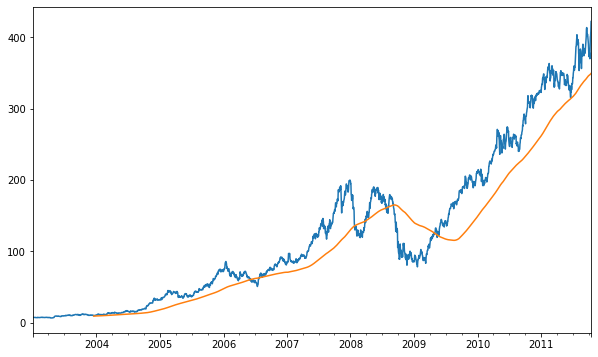

In [19]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

<AxesSubplot:>

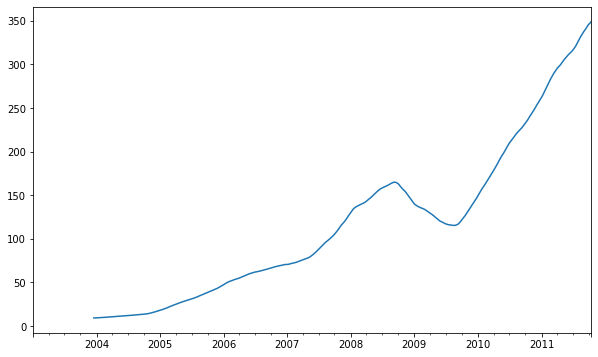

In [17]:
close_px.AAPL.rolling(250).mean().plot()

In [20]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

2003-01-02         NaN
2003-01-03         NaN
2003-01-06         NaN
2003-01-07         NaN
2003-01-08         NaN
2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64


<AxesSubplot:>

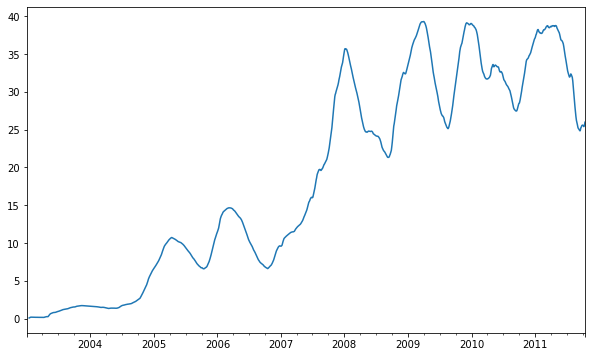

In [23]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()

print(appl_std250[:12])#[5:12]
appl_std250.plot()

In [31]:
expanding_mean = appl_std250.expanding().mean()
print((0.077496 +  0.074760)/2)
expanding_mean[5:12]


0.076128


2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.076128
2003-01-17    0.088208
Freq: B, Name: AAPL, dtype: float64

In [25]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<AxesSubplot:>

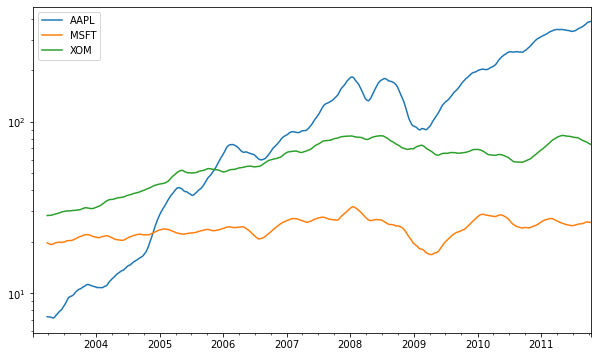

In [26]:
close_px.rolling(60).mean().plot(logy=True)

<AxesSubplot:>

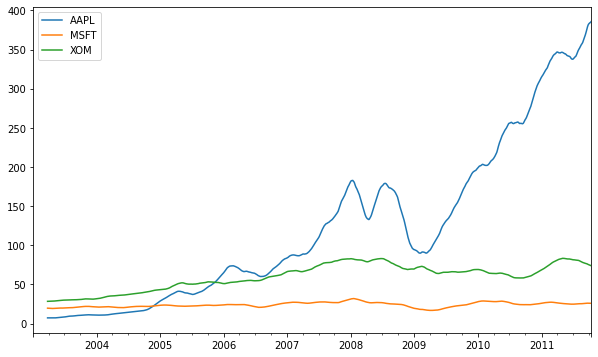

In [32]:
close_px.rolling(60).mean().plot(logy=False)

In [35]:
print(close_px.rolling('20D').mean()[20:22])
close_px.rolling('20D').mean() 

                AAPL       MSFT        XOM
2003-01-30  7.155714  20.446429  27.948571
2003-01-31  7.157333  20.326667  27.960667


,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


In [33]:
close_px.rolling('3D').mean() 

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.450000,21.520000,29.960000
2003-01-07,7.440000,21.725000,29.455000
2003-01-08,7.386667,21.586667,29.246667
...,...,...,...
2011-10-10,388.810000,26.940000,76.280000
2011-10-11,394.550000,26.970000,76.275000
2011-10-12,397.096667,26.966667,76.570000
2011-10-13,403.636667,27.046667,76.600000


### Exponentially Weighted Functions 指数加权函数

In [ ]:
plt.figure()

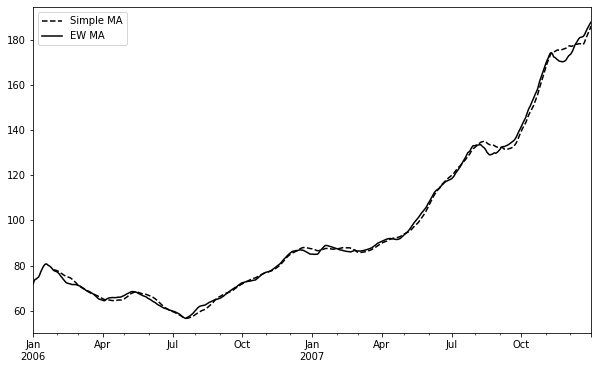

In [36]:
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()

### Binary Moving Window Functions

In [ ]:
plt.figure()

In [38]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

In [ ]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

In [ ]:
plt.figure()

In [ ]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

### User-Defined Moving Window Functions

In [ ]:
plt.figure()

<AxesSubplot:>

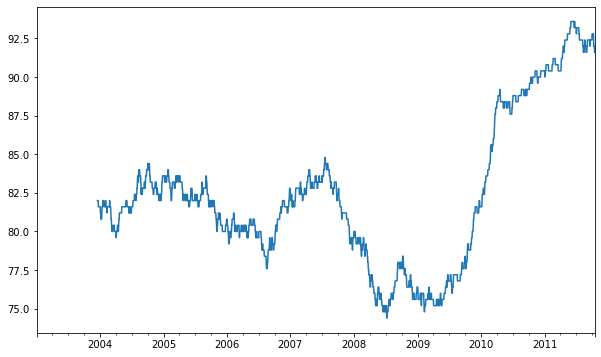

In [39]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()

In [ ]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS

## Conclusion